In [1]:
import torch
import zipfile

In [2]:
import cv2
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

In [3]:
def get_character_bounding_boxes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    output = cv2.connectedComponentsWithStats(
        thresh, 8, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    new_stats = []
    added = [False for i in range(len(stats))]
    threshhold = .5
    for i in range(1,len(stats)):
        if added[i]:
            continue

        (xi, yi, wi, hi, ai) = stats[i]
        for j  in range(i+1,len(stats)):
            if added[j]:
                continue

            (xj, yj, wj, hj, aj) = stats[j]
            if xi<=xj:
                if xi+wi>=xj+wj:
                    hi = max(yi+hi,yj+hj)
                    yi = min(yi,yj)
                    hi = hi-yi
                    ai += aj
                    added[j] = True
                elif xi+wi>=xj:
                    o = xi+wi-xj
                    if o/wi>threshhold or o/wj>threshhold:
                        wi = xj+wj-xi
                        hi = max(yi+hi,yj+hj)
                        yi = min(yi,yj)
                        hi = hi-yi
                        ai += aj
                        added[j] = True

            if xj<xi:
                if xj+wj>=xi+wi:
                    xi = xj
                    wi = wj
                    hi = max(yi+hi,yj+hj)
                    yi = min(yi,yj)
                    hi = hi-yi
                    ai += aj
                    added[j] = True
                elif xj+wj>=xi:
                    o = xj+wj-xi
                    if o/wi>threshhold or o/wj>threshhold:
                        wi = xj+wj-xi
                        hi = max(yi+hi,yj+hj)
                        yi = min(yi,yj)
                        hi = hi-yi
                        ai += aj
                        added[j] = True

        new_stats.append([xi, yi, wi, hi, ai])
        added[i] = True

    new_stats = sorted(new_stats, key=lambda x: x[0])
    return new_stats

def extract_bounding_box(img, bounding_box):
    (x, y, w, h, a) = bounding_box
    cropped = img[y:y+h, x:x+w]
    gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return gray

In [4]:
num_classes = 17
input_channels = 1
conv_layers = nn.Sequential(
    nn.Conv2d(input_channels, 16, 3, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 64, 3, padding=1),
    nn.ReLU()
)

# Calculate the size of the output of the conv_layers by doing one forward pass
dummy_input = torch.randn(1, input_channels, 128, 128)
output = conv_layers(dummy_input)
conv_out = output.shape[1] * output.shape[2] * output.shape[3]

model = nn.Sequential(
    conv_layers,
    nn.Flatten(),
    nn.Linear(conv_out, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, num_classes)
)

model.load_state_dict(torch.load('model8432.pth'))

<All keys matched successfully>

In [5]:
rev_mapping = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'add',
    11: 'dec',
    12: 'div',
    13: 'eq',
    14: 'mul',
    15: 'sub',
    16: 'x'
 }

In [41]:
images_dir = 'handwritten-full-test'
images = [f.path for f in os.scandir(images_dir)]

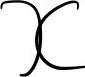

In [42]:
img = images[0]
img = cv2.imread(img)
bbs = get_character_bounding_boxes(img)
Image.fromarray(extract_bounding_box(img, bbs[0]))

In [43]:
# Get max width and height
max_w = max([bb[2] for bb in bbs])
max_h = max([bb[3] for bb in bbs])

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


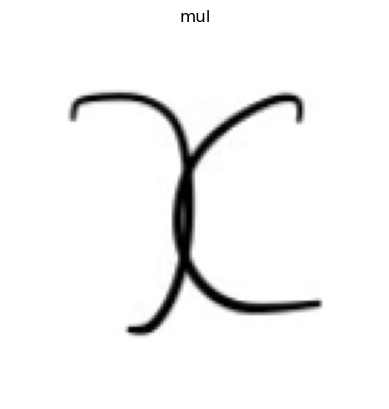

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


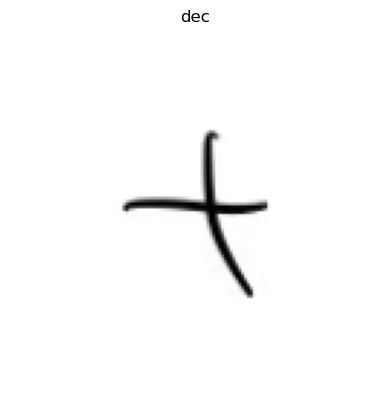

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


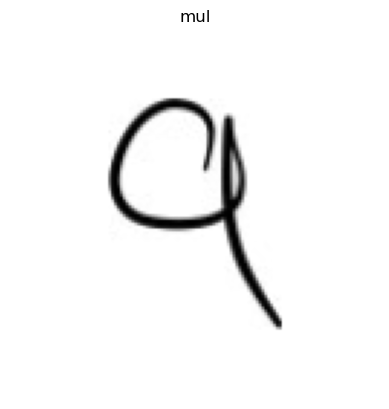

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


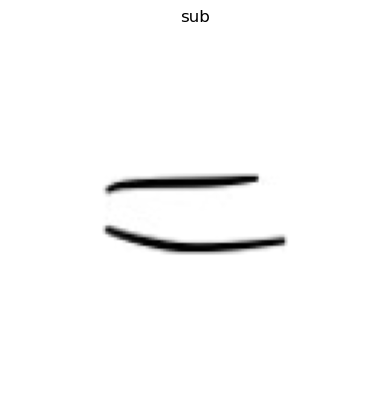

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


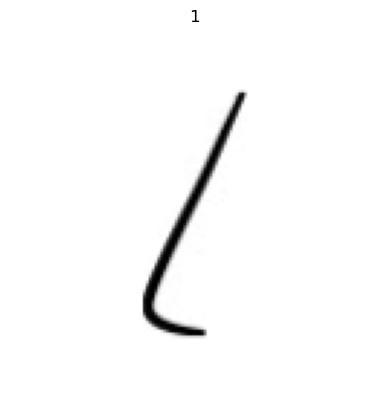

tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.]]]])


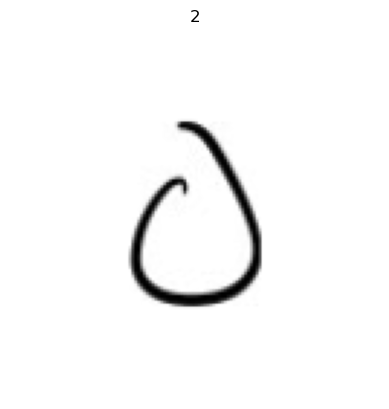

In [75]:
for bb in bbs:
    (x, y, w, h, a) = bb
    char = extract_bounding_box(img, bb)
    pad_width = int((max_w - w) / 2) + 20
    pad_height = int((max_h - h) / 2) + 20
    # pad_width = 40
    # pad_height = 40
    char = cv2.copyMakeBorder(char, pad_height, pad_height, pad_width, pad_width,
                             cv2.BORDER_CONSTANT, value=(255, 255))
    char = cv2.resize(char, (128, 128))
    # char = cv2.bitwise_not(char)
    # kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed
    # char = cv2.dilate(char, kernel, iterations=1)
    # char = cv2.bitwise_not(char)
    # cv2.imwrite('x_segmented.png', char) 
    char = np.expand_dims(char, axis=0)
    char = np.expand_dims(char, axis=0)
    char = torch.from_numpy(char).float()
    print(char)
    pred = model(char)
    # print(rev_mapping[pred.argmax().item()])
    plt.axis('off')
    plt.title(rev_mapping[pred.argmax().item()])
    plt.imshow(char[0][0], cmap='gray')
    plt.show()

In [58]:
x_test = cv2.imread('0_test.jpg')
x_test = cv2.cvtColor(x_test, cv2.COLOR_BGR2GRAY)
x_test = cv2.resize(x_test, (128, 128))
cv2.imwrite('x_test_transformed.png', x_test) 
x_test = np.expand_dims(x_test, axis=0)
x_test = np.expand_dims(x_test, axis=0)
x_test = torch.from_numpy(x_test).float()
# img = img.permute(2,0,1)

In [59]:
pred = model(x_test)
rev_mapping[pred.argmax().item()]

'0'